In [25]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import networkx as nx

from sklearn.model_selection import train_test_split

In [26]:
%matplotlib inline

In [27]:
seed = 3

# Load the data

In [28]:
data_path = 'data/'

In [29]:
# Kaggle data
movies_path = data_path + 'tmdb-5000-movie-dataset/'
credits = pd.read_csv(movies_path + 'tmdb_5000_credits.csv')
movies = pd.read_csv(movies_path + 'tmdb_5000_movies.csv')

credits = credits.rename(columns={'movie_id': 'id'})

# merge the two data set credit and movies
movies = movies.merge(credits, how='inner', on='id')

movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


# Clean and prepare the data

In [30]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

In [31]:
movies['earnings'] = (movies['revenue'] - movies['budget']) / movies['budget']

In [32]:
# keep only useful movies
movies = movies[['original_title', 'budget', 'revenue', 'earnings', 'production_companies', 'cast', 'crew']]
movies.head(5)

,original_title,budget,revenue,earnings,production_companies,cast,crew
0,Avatar,237000000,2787965087,10.763566,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,Pirates of the Caribbean: At World's End,300000000,961000000,2.203333,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,Spectre,245000000,880674609,2.594590,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,The Dark Knight Rises,250000000,1084939099,3.339756,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,John Carter,260000000,284139100,0.092843,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [33]:
movies.sort_values(by='earnings').head()
movies.head(5)

,original_title,budget,revenue,earnings,production_companies,cast,crew
0,Avatar,237000000,2787965087,10.763566,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,Pirates of the Caribbean: At World's End,300000000,961000000,2.203333,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,Spectre,245000000,880674609,2.594590,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,The Dark Knight Rises,250000000,1084939099,3.339756,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,John Carter,260000000,284139100,0.092843,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [34]:
movies.sort_values(by='earnings', ascending=False).head()

,original_title,budget,revenue,earnings,production_companies,cast,crew
4014,Kevin Hart: Let Me Explain,0,32230907,inf,"[{""name"": ""Hartbeat Productions"", ""id"": 40268}]","[{""cast_id"": 2, ""character"": ""Himself"", ""credi...","[{""credit_id"": ""58c6a9d2c3a368413001627a"", ""de..."
2393,Madea Goes to Jail,0,90508336,inf,"[{""name"": ""Lions Gate Films"", ""id"": 35}, {""nam...","[{""cast_id"": 5, ""character"": ""Madea / Joe / Br...","[{""credit_id"": ""52fe46709251416c7507868d"", ""de..."
3778,The Art of Getting By,0,1406224,inf,"[{""name"": ""Goldcrest Films International"", ""id...","[{""cast_id"": 2, ""character"": ""George Zinavoy"",...","[{""credit_id"": ""593c6b79c3a3680f590129a9"", ""de..."
3782,Holy Motors,0,641100,inf,"[{""name"": ""Pandora Filmproduktion"", ""id"": 254}...","[{""cast_id"": 3, ""character"": ""Kay M"", ""credit_...","[{""credit_id"": ""52fe4a1cc3a36847f81ba1cb"", ""de..."
1922,Gettysburg,0,25000000,inf,"[{""name"": ""TriStar Television"", ""id"": 8609}, {...","[{""cast_id"": 1, ""character"": ""Col. Joshua Cham...","[{""credit_id"": ""52fe439d9251416c750173fd"", ""de..."


After checking some of the data, we ca see that some of the values in the budget and revenue columns are expressed in millions wheras most of the values are raw numbers. We then choose to remove the values expressed in millions for more consistency of the future results. This is done by selecting only the movies that have a budget and revenue bigger than 1000 (it is unlikely that a movie will have a buget or a revenue more than a billion dollars).

In [35]:
prev_len = len(movies)
movies = movies[(movies['budget'] > 1000) & (movies['revenue'] > 1000)].reset_index(drop=True)
n_movies = len(movies)
print(prev_len - n_movies, 100*(prev_len - n_movies)/prev_len)

1592 33.14595044763689


This deletion represents 18 movies (~0.6% of the data), which is an acceptable value.

In [36]:
movies.sort_values(by='earnings', ascending=False).head()

,original_title,budget,revenue,earnings,production_companies,cast,crew
3158,Paranormal Activity,15000,193355800,12889.386667,"[{""name"": ""Blumhouse Productions"", ""id"": 3172}...","[{""cast_id"": 3, ""character"": ""Katie"", ""credit_...","[{""credit_id"": ""52fe4477c3a368484e024b01"", ""de..."
3142,The Blair Witch Project,60000,248000000,4132.333333,"[{""name"": ""Artisan Entertainment"", ""id"": 2188}...","[{""cast_id"": 41, ""character"": ""Mike"", ""credit_...","[{""credit_id"": ""52fe4364c3a36847f8050c01"", ""de..."
3200,Eraserhead,10000,7000000,699.000000,"[{""name"": ""American Film Institute (AFI)"", ""id...","[{""cast_id"": 13, ""character"": ""Henry Spencer"",...","[{""credit_id"": ""52fe4296c3a36847f802a5dd"", ""de..."
3207,Pink Flamingos,12000,6000000,499.000000,"[{""name"": ""Dreamland Productions"", ""id"": 407}]","[{""cast_id"": 8, ""character"": ""Divine / Babs Jo...","[{""credit_id"": ""52fe426bc3a36847f801d203"", ""de..."
3202,Super Size Me,65000,28575078,438.616585,"[{""name"": ""Kathbur Pictures"", ""id"": 8735}]","[{""cast_id"": 1, ""character"": ""Himself"", ""credi...","[{""credit_id"": ""52fe44efc3a36847f80b2a9d"", ""de..."


In [37]:
to_keep = 5

movies['actors'] = movies.cast.map(lambda x: list(map(lambda d: d['name'], json.loads(x)))[:to_keep])

movies['characters'] = movies.cast.map(lambda x: list(map(lambda d: d['character'], json.loads(x)))[:to_keep])

#movies['crew'] = movies.crew.map(lambda x: list(map(lambda d: d['name'], json.loads(x)))[:to_keep])

movies['production_companies'] = movies.production_companies.map(lambda x: list(map(lambda d: d['name'], json.loads(x)))[:1])

#movies = movies[['original_title', 'earnings', 'production_companies', 'actors', 'characters', 'crew']]
movies = movies[['original_title', 'earnings', 'production_companies', 'actors', 'characters']]

movies.head(5)

,original_title,earnings,production_companies,actors,characters
0,Avatar,10.763566,[Ingenious Film Partners],"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Jake Sully, Neytiri, Dr. Grace Augustine, Col..."
1,Pirates of the Caribbean: At World's End,2.203333,[Walt Disney Pictures],"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Captain Jack Sparrow, Will Turner, Elizabeth ..."
2,Spectre,2.594590,[Columbia Pictures],"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[James Bond, Blofeld, Madeleine, M, Lucia]"
3,The Dark Knight Rises,3.339756,[Legendary Pictures],"[Christian Bale, Michael Caine, Gary Oldman, A...","[Bruce Wayne / Batman, Alfred Pennyworth, Jame..."
4,John Carter,0.092843,[Walt Disney Pictures],"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[John Carter, Dejah Thoris, Sola, Tars Tarkas,..."


In [38]:
movies['features'] = movies['production_companies'] + movies['actors'] + movies['characters']
movies = movies[['original_title', 'earnings', 'features']]
movies.head(5)

,original_title,earnings,features
0,Avatar,10.763566,"[Ingenious Film Partners, Sam Worthington, Zoe..."
1,Pirates of the Caribbean: At World's End,2.203333,"[Walt Disney Pictures, Johnny Depp, Orlando Bl..."
2,Spectre,2.594590,"[Columbia Pictures, Daniel Craig, Christoph Wa..."
3,The Dark Knight Rises,3.339756,"[Legendary Pictures, Christian Bale, Michael C..."
4,John Carter,0.092843,"[Walt Disney Pictures, Taylor Kitsch, Lynn Col..."


# Compute weights of features

In [39]:
# Create the features table with their weights associated weights (set to 0).
features = set(movies['features'].sum())
features.discard('')
features = list(features)
features.sort()
features = pd.DataFrame(features, columns=['feature'])
features['weight'] = 0
features.head()

,feature,weight
0,Larry Mullen Jr.,0
1,"""Drugs"" Delaney",0
2,"""Hickory"" / The Tin Man",0
3,"""Hunk"" / The Scarecrow",0
4,"""Whistling"" John Shaw",0


In [40]:
# A DataFrame where each row contains only one feature (actor, character or production company)
# Easier for later computations
df = movies.set_index(['original_title', 'earnings'])['features'].apply(pd.Series).stack().reset_index().drop('level_2', axis=1)
df.columns = ['original_title', 'earnings', 'feature']
df.head()

,original_title,earnings,feature
0,Avatar,10.763566,Ingenious Film Partners
1,Avatar,10.763566,Sam Worthington
2,Avatar,10.763566,Zoe Saldana
3,Avatar,10.763566,Sigourney Weaver
4,Avatar,10.763566,Stephen Lang


In [41]:
for i, feature in enumerate(features['feature']):
    in_movie = df[df['feature'] == feature]
    features.loc[i, 'weight'] = in_movie['earnings'].sum() / len(in_movie)

In [42]:
features.sort_values(by='weight', ascending=False)
features[features['feature'] == 'James Bond']

,feature,weight
8635,James Bond,12.546743


In [43]:
df.head()

,original_title,earnings,feature
0,Avatar,10.763566,Ingenious Film Partners
1,Avatar,10.763566,Sam Worthington
2,Avatar,10.763566,Zoe Saldana
3,Avatar,10.763566,Sigourney Weaver
4,Avatar,10.763566,Stephen Lang


# Compute Adjacency Matrix

In [45]:
n_nodes = len(movies)

try:
    adjacency = np.load(data_path + 'adjacency.npy')

except FileNotFoundError: 
    adjacency = np.zeros((n_nodes, n_nodes), dtype=int)
    for i in range(n_nodes):
            # as the adjacency matrix is symmetric, only the upper triangular is calculated to save time
            for j in range(i, n_nodes):
                # create weighted edges as the shared number of actors between movies
                common_actors = set(movies['features'][i]).intersection(set(movies['features'][j]))
                sum_weights = 0.0

                for name in common_actors :
                    if (features['feature'].isin([name]).any()):
                        sum_weights = sum_weights + features[features['feature'] == name]['weight'].item()
                

                adjacency[i, j] = sum_weights
      
    # fill the lower triangular 
    adjacency += np.transpose(adjacency)

    np.fill_diagonal(adjacency, 0, wrap=False)
    np.save(data_path + 'adjacency.npy', adjacency)

In [46]:
print('Our graph contains {} movies.'.format(n_nodes))

Our graph contains 3211 movies.


Text(0.5, 1.05, 'adjacency matrix')

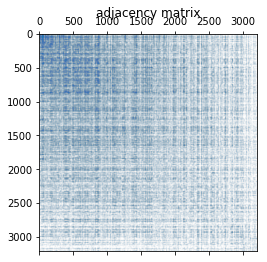

In [47]:
plt.spy(adjacency, markersize=0.01)
plt.title('adjacency matrix')

L_max = 5153655.0
L = 321554
Sparsity = 0.9376066112302822


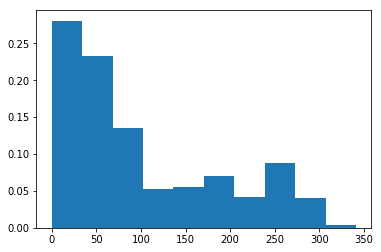

In [48]:
# maximum number of Links in our network
L_max = n_nodes*(n_nodes-1)/2
print('L_max =', L_max)

# number of link in our network
L = np.count_nonzero(adjacency)
print('L =',L)

# sparisty
sparsity = (L_max-L)/L_max
print('Sparsity =', sparsity)

# Create the binary version of adjacency matrix as our adjacency is weighted
adj_binary = adjacency.astype(bool).astype(int)
degree =  np.sum(adj_binary, axis=0)

#Histogram of degree distribution
weights = np.ones_like(degree) / float(n_nodes)
plt.hist(degree, weights=weights);

In [52]:
def adj_matrix_to_list(adj):
    """Transform adjacency matrix into a dictionnary : each node is linked with all his neighbor nodes
    
    Parameters
    ----------
    adjacency matrix 
    
    Returns
    -------
    adj_list : dictionnary
    """
    
    adj_list = {} 
    for node, nodes in enumerate(adj):
        neighbors = []
        for next_node, weighted_edge in enumerate(nodes):
            if weighted_edge:
                neighbors.append(next_node)
        adj_list[node] = neighbors
    return adj_list

In [53]:
# The BFS algorithm
def bfs(adj_list, start, labels, l=1):
    
    """Apply the BFS algorithm 
    
    Parameters
    ----------
    adj_list: adjacency matrix transformed to a list (see ajd_matrix_to_list)
    start: Starting node
    labels : will contain the information whether a node has been visited or not
    
    Returns
    -------
    labels : contain the information whether a node has been visited or not
    bool connected : true if all the nodes are connected
    visited : a list of all the visited nodes
        True if the graph is connected, False otherwise.
    """
    
    
    nodes = list(labels.keys())
    #q is a queue, it contains the next node to be inspected (initialized with the starting node)
    q = []
    q.append(start)
    #label contains for each node l (if the node has already been inspected) or 0
    labels[start] = l
    
    #while there is nodes to inspect
    while len(q):
        node = q.pop(0)
        
        #inspect all the nodes linked to 'node'
        for neighbor in adj_list[node]: 
            #if it has not already been inspected, add it to the queue, and label it to 1
            if labels[neighbor] == 0: 
                q.append(neighbor)
                labels[neighbor] = l
    #contains all the connected nodes
    visited = {node: label for (node, label) in labels.items() if label !=0} 
    connected = len(visited) == len(nodes)
    return labels, connected, visited

In [54]:
def find_components(adjacency):
    """Find the connected components of a graph.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    
    Returns
    -------
    list of numpy arrays
        A list of adjacency matrices, one per connected component.
    """
    components = list()
    # transform the adjacency matrix into an adjacency list where the weights are ignored
    adj_list = adj_matrix_to_list(adjacency) 
    
    # l: the label of the components
    l = 1
    
    # select a random node to start exploring the graph
    start = np.random.choice(list(adj_list.keys()))
    nodes = list(adj_list.keys())
    
    # apply BFS to label the nodes of the first component and to know if the graph is connected
    labels, visited_all, _ = bfs(adj_list, start, {node: 0 for node in nodes})
    visited = [node for node, label in labels.items() if label == l]
    components.append(adjacency[visited, :][:, visited]) 
    
    # while we did not label every node
    while not visited_all:
        l += 1
        to_visit = [node for node, label in labels.items() if label == 0]
        start = np.random.choice(list(to_visit))
        # apply new BFS to explore new component
        labels, visited_all,_ = bfs(adj_list, start, labels, l)
        visited = [node for node, label in labels.items() if label == l]
        components.append(adjacency[visited, :][:, visited]) 
    
    # the list of all components sorted by descending size 
    components.sort(key=lambda mat: mat.shape, reverse=True)    
    return components, labels

In [58]:
try:
    BC_nparray = np.load(data_path + 'BC.npy')
    nodes_BC = np.load(data_path + 'nodes_BC.npy')
    
except FileNotFoundError:
    components, labels = find_components(adjacency)
    BC_nparray = components[0]
    label_count = np.unique(np.fromiter(labels.values(), dtype=int), return_counts=True)
    lab_dict = dict(zip(label_count[0], label_count[1]))
    label_bc = max(lab_dict, key=lab_dict.get)
    nodes_bc = [node for node, label in labels.items() if label == label_bc]
    np.save(data_path + 'BC.npy', BC_nparray)
    np.save(data_path + 'nodes_bc.npy', nodes_bc)
    
print('There are {number} connected components and the size of the largest is {size}.'.format(number=len(components), size=len(components[0])))

There are 64 connected components and the size of the largest is 3145.


In [60]:
G = nx.from_numpy_array(BC_nparray)

print('Clustering coefficient of our Biggest Component =' ,nx.average_clustering(G))

Clustering coefficient of our Biggest Component = 0.5421199049721809


In [25]:
#PAS FINI


# Labels are 1 if the movie contains 'Comedy' in its genres and 0 if it does not
labels = np.load('labels.npy')[nodes_bc]
labels = np.array([label if label == 1 else -1 for label in labels])
labels = labels.astype(float)

n_nodes = len(BC)

degree_biggest_component= np.sum(BC_nparray, axis=0)

#Gradient calculation:

# Let us compute the gradient
N = BC.shape[0]  # number of nodes
E = np.sum(BC>0)  # number of edges (non-zero entries of A)
gradient = np.zeros((E, N))
eij = 0  # edge index

for i in range(N):
    for j in range(N):
        wij = BC[i, j]
        if wij > 0:
            gradient[eij,i] = math.sqrt(wij)/math.sqrt(2*degree_biggest_component[i])
            gradient[eij,j] = -math.sqrt(wij)/math.sqrt(2*degree_biggest_component[j])
            eij = eij + 1  # increment the edge index
            
laplacian = (gradient.T@gradient) #Laplacian Normalisé calculé avec le gradient.

sparse_gradient = sparse.csr_matrix(gradient)
sparse_laplacian = sparse.csr_matrix(laplacian)

FileNotFoundError: [Errno 2] No such file or directory: 'nodes_bc.npy'